In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Declare base
Base = automap_base()

# reflect an existing database into a new model
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create a session
session = Session(engine)

In [10]:
# Display first row of data in dictionary format to get sense of layout
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fc5c149ccd0>,
 'station': 'USC00519397',
 'prcp': 2.0,
 'id': 0,
 'date': '2010-01-01',
 'tobs': 18.3}

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).group_by(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date[0]

'2017-08-23'

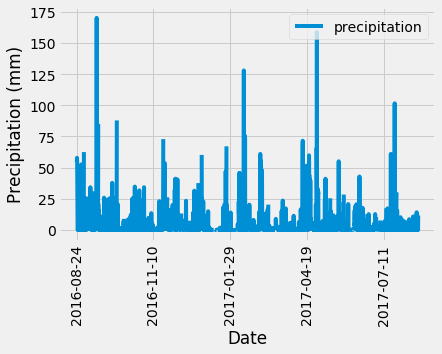

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
meas_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
meas_df = pd.DataFrame(meas_data, columns = ['date', 'prcp'])
meas_df = meas_df.rename(columns={'prcp':'precipitation'})

# Sort the dataframe by date 
meas_df = meas_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
meas_df.plot(x='date', y='precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.legend(loc="upper right")

# Show plot
plt.show()


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
all_prcp_data = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
    filter(Measurement.date > year_ago).all()

summary_stats_df = pd.DataFrame(all_prcp_data, columns = ['date', 'prcp', 'tobs'])
summary_stats_df = summary_stats_df.rename(
    columns={
        'date': 'Date',
        'prcp': 'Precipitation (mm)',
        'tobs': 'Time of Observation Error'}
        )

summary_stats_df.describe().round(3)

,Precipitation (mm),Time of Observation Error
count,2015.000,2223.000
mean,4.485,23.656
std,11.691,2.564
min,0.000,14.400
25%,0.000,21.700
50%,0.500,23.900
75%,3.300,25.600
max,170.200,30.600


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
unique_station_count = session.query(Measurement).group_by(Measurement.station).count()
print(f'The total number of stations in the dataset is {unique_station_count}.')

The total number of stations in the dataset is 9.


In [27]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_act_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
most_act_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [38]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == most_act_station[0][0]).all()

max_temp = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == most_act_station[0][0]).all()

avg_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_act_station[0][0]).all()

print(f'The lowest temperature for station {most_act_station[0][0]} is {min_temp[0][0]}')
print(f'The highest temperature for station {most_act_station[0][0]} is {max_temp[0][0]}')
print(f'The average temperature for station {most_act_station[0][0]} is {round(avg_temp[0][0],1)}')


The lowest temperature for station USC00519281 is 12.2
The highest temperature for station USC00519281 is 29.4
The average temperature for station USC00519281 is 22.0


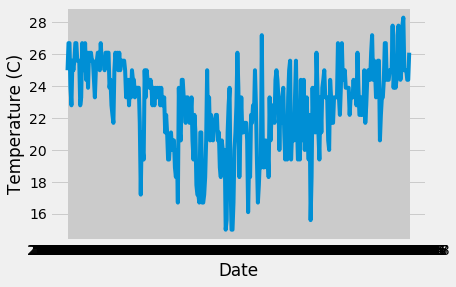

In [49]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_obs = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_act_station[0][0]).\
    filter(Measurement.date > year_ago).all()

# Plot results as a histogram
# Create empty lists for data
temp_datapoints = []
date_ticks = []

# Append data to lists
for row in temp_obs:
    temp_datapoints.append(float(row[1]))
    date_ticks.append(str(row[0]))

session.close()

# Plot the results as a histogram
plt.plot(date_ticks, temp_datapoints)
plt.xlabel("Date")
plt.ylabel("Temperature (C)")
# plt.legend(loc="upper right")

# Show plot
plt.show()


# Close session

In [ ]:
# Close Session
session.close()